In [107]:
import sys, os
import numpy as np
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error as mae
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import tikzplotlib

from torchvision.datasets import VisionDataset
working_path = os.path.join(os.path.dirname(os.getcwd()), '')
sys.path.append(working_path)
#from src.modules import STLSTM
#from src.datasets import TestDataset
#from src.utils import getModel, getYTruePredPairs
from src.pydiver.models import lstm
from src.pydiver.datasets import barkley_datasets
# %%
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Found', torch.cuda.device_count(), 'GPUs')

Found 1 GPUs


In [12]:
fileX = "/home/roland/Projekte/Tests/FromSurface2DepthKedro/data/06_additional/validation_regimeB/X_test.npy"
fileY = "/home/roland/Projekte/Tests/FromSurface2DepthKedro/data/06_additional/validation_regimeB/Y_test.npy"

In [19]:
def getModel(model_architecture, model_file, device, strict=True):         
    model_architecture.load_state_dict(torch.load(model_file, map_location=device), strict=strict)
    return model_architecture

def get_model_by_int(integer):
    path = "/home/roland/Projekte/Tests/FromSurface2DepthKedro/data/03_models/regimeB/"
    name = f"STLSTM_t_0_2_4_6_8_10_12_14_16_18_20_22_24_26_28_30_31_d_{integer}"
    model_file = os.path.join(path, name)
    model_architecture = nn.DataParallel(lstm.STLSTM(1,64))
    model = getModel(model_architecture, model_file, device)
    return model

inds = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,31]

In [20]:
model = get_model_by_int(20)

In [24]:
X[:1,inds].shape

(1, 17, 1, 120, 120)

In [25]:
with torch.no_grad():
    pred = model(X[:1, inds], max_depths=1)

TypeError: forward() got an unexpected keyword argument 'max_depths'

In [15]:
X = np.load(fileX)
Y = np.load(fileY)

dataset = barkley_datasets.TestDataset(X, Y)

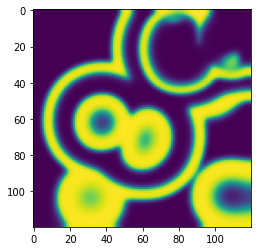

In [16]:
dataset[0][0].shape
plt.imshow(dataset[0][0][0,0])

In [7]:
Y.shape

(3072, 1, 32, 120, 120)

In [28]:
def file_by_int(integer):
    path = "/home/roland/Projekte/Tests/FromSurface2DepthKedro/data/05_validation/regimeB/"
    filename = f"STLSTM_t_0_2_4_6_8_10_12_14_16_18_20_22_24_26_28_30_31_d_{integer}_Y_test_00.npy"
    file = os.path.join(path, filename)
    data = np.load(file)
    return data
    

In [41]:
data = []
for i in range(32):
    loss = file_by_int(i)
    data.append(loss)

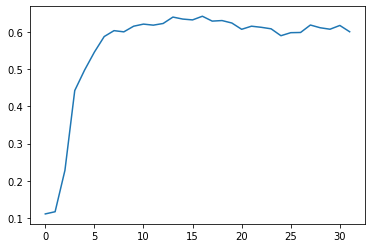

In [42]:
plt.plot(np.sqrt(data))

In [75]:
data = [0.0000232,0.0000270,0.0000845,0.0001155,
       0.0002165,0.000664,0.001049,0.001375,0.0025,0.004208,
       0.006014,0.008639,0.0091,0.01572,0.0265,0.0179,
        0.03331,0.04071,0.06166,0.05349,0.07592,0.07289,
        0.08753,0.1231]
t_0_2_d_x = np.array(data)**0.5

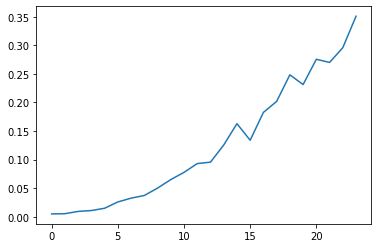

In [45]:
plt.plot(np.array(data)**0.5)

In [64]:
t_0_6_d_x = [0.000074,0.0000315,0.0000759,0.0002074,
       0.0002638,0.000596,0.001522,0.001866,0.002639,
       0.004881,0.004959,0.007136,0.01319,0.01793,
       0.01971,0.01574,0.02692,0.03964,0.03945,0.05545,
       0.07619,0.07241,0.1102,0.111,0.1176,0.1231,0.1486,0.1373,0.1504,
       0.155,0.1514,0.1501]
t_0_6_d_x = np.array(t_0_6_d_x)**0.5

In [70]:
t32_d32 = [0.0263518318533897,
0.0249558370560408,
0.0244182776659727,
0.0248121917247772,
0.0265930332243443,
0.0293030608445406,
0.0325270816683769,
0.0362166091799736,
0.0404719486832619,
0.0453968681395054,
 0.0511588752269745,
 0.0579599067568779,
 0.0660335272550583,
 0.0756146237254143,
 0.0868203639984131,
 0.0996247678995132,
 0.113955460488796,
0.129742711782455,
0.146704599261284,
0.164421752095222,
0.182466879487038,
0.200292274355888,
0.217512175440788,
0.233807593584061,
0.248873695731163,
0.262669265270233,
0.275095403194427,
0.286172747612,
0.295961439609528,
0.304602831602097,
0.312346011400223,
0.319211006164551]

t_32_d_x = [
0.00520562566816807,
0.00389883457683027,
0.00642593670636415,
0.00855170283466578,
0.00988241191953421,
0.011144045740366,
0.0148660140112042,
0.0189233925193548,
0.0260560661554337,
0.0297616608440876,
0.0372891686856747,
0.0447909757494926,
0.0514606237411499,
0.0622327029705048,
0.0697509869933128,
0.0821165665984154,
0.0965808853507042,
0.126176729798317,
0.135096862912178,
0.155314400792122,
0.182847306132317,
0.214167684316635,
0.242563739418983,
0.268653512001038,
0.312957137823105,
0.329769879579544,
0.337288200855255,
0.348661333322525,
0.344058245420456,
0.348134607076645,
0.352096110582352,
0.353568106889725,
]

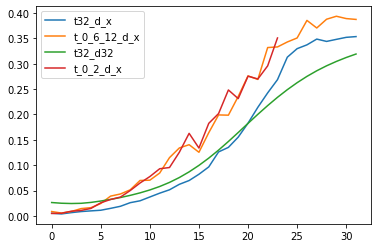

In [76]:
#plt.plot(data)
plt.plot(t_32_d_x,label="t32_d_x")
plt.plot(t_0_6_d_x, label="t_0_6_12_d_x")
plt.plot(t32_d32, label="t32_d32")
plt.plot(t_0_2_d_x, label="t_0_2_d_x")
plt.legend()

In [77]:
mae_regimeA_STLSTM = np.load("/home/roland/Projekte/FromSurface2Depth/data/validation/mae_regimeA.npy")

(11, 32)

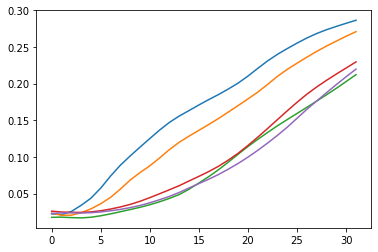

In [86]:
inds = [0,2,5,7,10]
data = mae_regimeA_STLSTM[inds,:]
plt.plot(data.T)
mae_regimeA_STLSTM.shape

In [85]:
len(xxx)

10

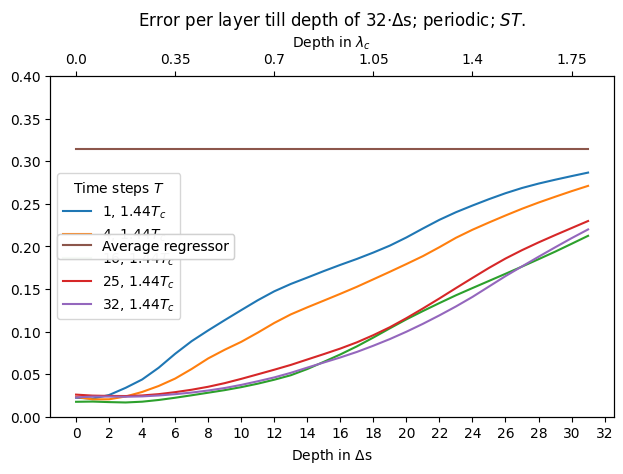

In [109]:
plt.style.use('default')

xxx = [1,2,4,8,12,16,20,25,28,30,32]
wanted = [1,4,16,25,32]
T_c = 356
lambda_c = 17.14

fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.subplots_adjust(left=0.10, right=0.98, top=0.83, bottom=0.12)

ax2 = ax1.twiny()

for T, loss in zip(xxx, mae_regimeA_STLSTM):
    #losses = mae_regimeA_STLSTM[10,:]
    if T in wanted:
        ax1.plot(loss, label=f'{T}, {np.round(16*32/T_c,2)}$T_c$')
#ax1.scatter(range(0,32),losses, c='blue', s=12)

ax1.set_xlabel("Depth in $\Delta$s")

#ax1.scatter(range(0,32), t_32_d_x, label=f'{32}, {np.round(16*32/T_c,2)}$T_c$', c='red', s=12)

plt.title("Error per layer till depth of 32$\cdot\Delta$s; periodic; $ST$.")

ticks = np.arange(0,34,2)
ax1.set_xticks(ticks)

#avg, = ax1.plot((0,31),(0.3137254901960784, 0.3137254901960784))
avg, = ax1.plot([0,31], [0.3137254901960784, 0.3137254901960784])

ax2.set_xlim(ax1.get_xlim())
tick_locations = np.arange(0,34,6)
ax2.set_xticks(tick_locations)
tick_function = lambda x: np.round(x/lambda_c,2)
ax2.set_xticklabels(tick_function(tick_locations))
ax2.set_xlabel(r"Depth in $\lambda_c$")

leg = plt.legend([avg], ["Average regressor"], loc=6)
plt.gca().add_artist(leg)
ax1.legend(title='Time steps $T$', loc=0)

plt.ylim([0,0.4])
#plt.savefig(f'STLSTM_global_layer_regimeA.pdf', dpi=600)

tikzplotlib.save(f'STLSTM_regimeA.tex')
